# Clustering

__Import libraries__

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, NMF
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

- Clustering is the task of partitioning the dataset into groups, called clustering.
- Points within a single cluster are very similar and points in different clusters are different.
- Clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to.

---

## k-Means Clustering

- One of the simplest and commonly used clustering algorithms.
- It tries to find the cluster centers that are representative of certain regions of the data.
- The algorithms alternate between two steps:
    - Assigning each data point to the closest cluster center.
    - Setting the cluster center as the mean of the data points that are assigned to it.

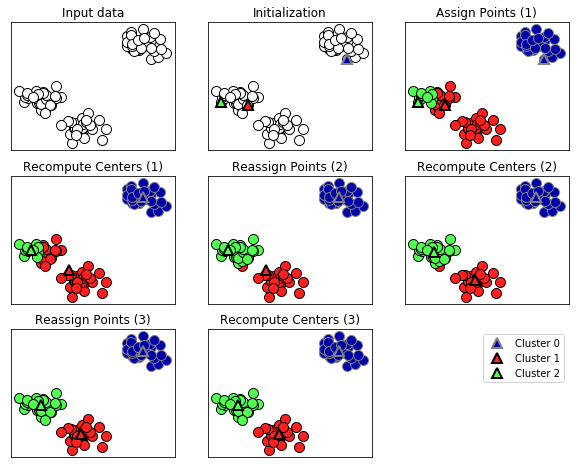

In [4]:
mglearn.plots.plot_kmeans_algorithm()

- Cluster center as triangles, data points as circles.
- We specified that we are looking for three clusters.
- Steps:
    - Assigning three random datapoints as cluster centers (Initialization).
    - Each data point is assigned to the cluster center it is closest to.
    - The cluster centers are updated to be the mean of the assigned points.
    - The process is repeated until the cluster center remain unchanged.
    

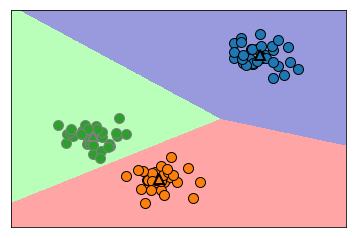

In [5]:
mglearn.plots.plot_kmeans_boundaries()

In [7]:
# generate synthetic two dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

During the algorithm, each training data point in X is assigned a cluster label. You can
find these labels in the kmeans.labels_ attribute:

In [8]:
print("Clustering memberships:\n{}".format(kmeans.labels_))

Clustering memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


We can throw new data points to kmeans, using predict method. But the existing model is not changed. Running predict on the training set returns the same result as labels_:

In [9]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


- Clustering somewhat similar to classification, but there is no ground truth.

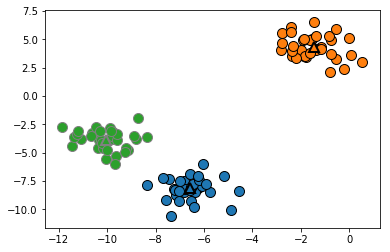

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2);

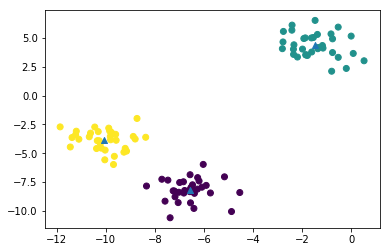

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^');

In [12]:
kmeans.cluster_centers_

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

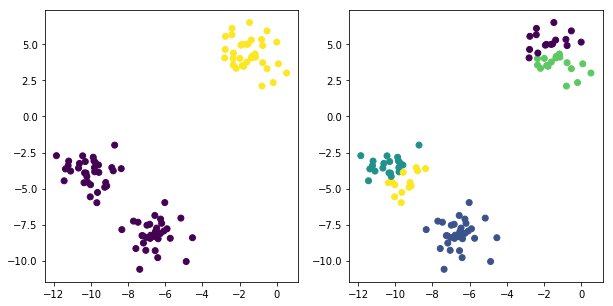

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
ax[0].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o')

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
ax[1].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o');

### Failure cases of k-means

- Even if we know the “right” number of clusters for a given dataset, k-means might not always be able to recover them.
- k-means can only capture relatively simple shapes.
- It always draws the boundary between clusters to be exactly in the middle between the cluster centers.

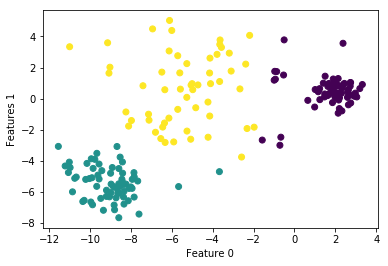

In [4]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)

y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.xlabel('Feature 0')
plt.ylabel('Features 1');

- k-means also assumes that all directions are equally important for each cluster.
- Cannot handle kind of data that are streched toward the diagonal.

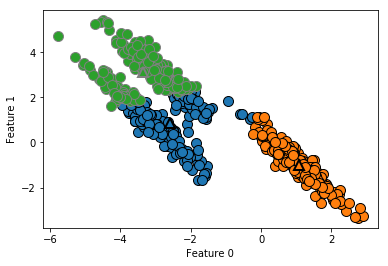

In [5]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be streched 
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

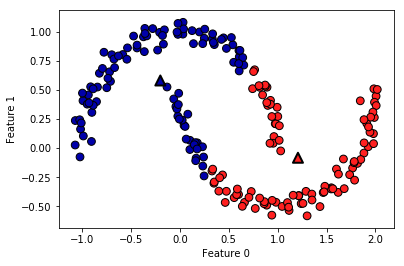

In [7]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

### Vector quantization, or seeing k-means as decompostion

- Recall: PCA finds directions with maximum variance, and NMF finds additive components, which often correspond to 'extremes' or 'parts' of the data.
- Both tried to express the data points as a sum over some components.
- k-means tries to represent each data point using a cluster center. Each point being represented using a single component, which is given by the cluster center. 

In [9]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [10]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, 
                                                   random_state=0)
pca = PCA(n_components=100, random_state=0).fit(X_train)
nmf = NMF(n_components=100, random_state=0).fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0).fit(X_train)

In [ ]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                        figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
    X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

- We can use more cluster than input dimensions.
- PCA and NMF for 2-dimensional data won't work, because we cannot reduce the dimensionality. Therefore k-means is a good tool for this type of data.

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


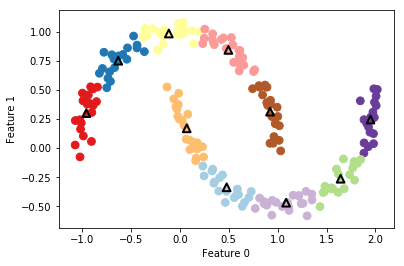

In [18]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
           marker='^', c=range(kmeans.n_clusters), edgecolor='k', linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

- This data being represented using 10 components (10 new features).
- Because now we have data with 10 features, then we can use linear models to make classification in make_moon kind of data.
- It is also possible to get an even more expressive representation of the data by using the distances to each of the cluster centers as features.

In [19]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


- k-means is very popular algorithm for clustering, because easy to understand and implement, also runs relaviterly quickly.
- k-means scales easily to large datasets.
- Drawbacks: 
    - relies on a random initialization, which means it depends on the random seed.
    - relatively restrictive assumptions made on the shape of the clusters, and the requirement of speciying the number of clusters.

---

## Agglomerative Clustering

- Refers to a collection of clustering algorithms that all build the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied.
- The stoping creterion is the number of clusters, so similar clusters are merged until only the specified number of clusters are left.
- Linkage criteria specify how exactly the "most similar cluster" is measured.

The following three choices are implemented in scikit-learn:
- ward
    - The default choice, ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized.
- average
    - average linkage merges the two clusters that have the smallest average distance between all their points.
- complete
    - complete linkage (also known as maximum linkage) merges the two clusters that have the smallest maximum distance between their points.

- ward works on most datasets. If the clusters have very dissimilar numbers of members, average or complete might work better.

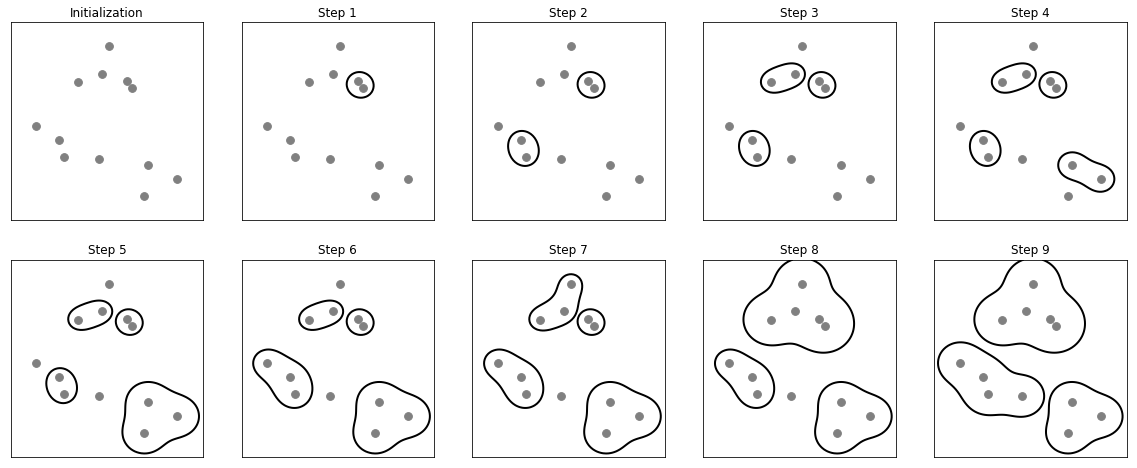

In [20]:
mglearn.plots.plot_agglomerative_algorithm()

- Initially, each point is its own cluster.
- Then, the two cluster that are closest are merged.
- In each step, adding more points within cluster.
- The alorithm stops when the specified number of cluster has achieved.
- Agglomerative clustering has no predict method.
- To build the model and get the cluster memberships on the training set, use the fit_predict method instead. Also, we can use labels_ attribute.

Text(0, 0.5, 'Feature 1')

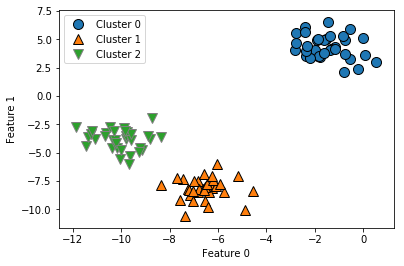

In [3]:
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Hierarchical clustering and dendograms

- Agglomerative clustering produces what is known as a hierachical clustering.
- The clustering proceeds iteratively, and every point makes a journey from being a single point cluster to belongin to some final cluster.

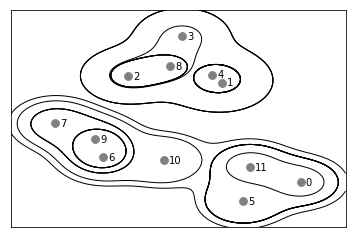

In [4]:
mglearn.plots.plot_agglomerative()

- We can visualize hierarchical clustering with dendrogram.
- Scipy provides a function that takes a data array X and computes a linkage array, which encodes hierarchical cluster similarities.

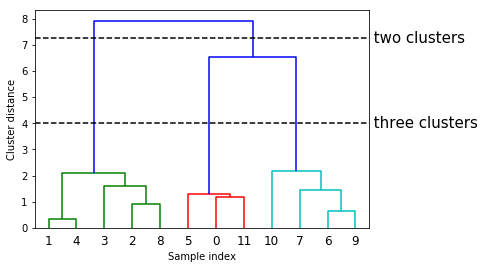

In [11]:
X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");

In [12]:
linkage_array

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])

- Linkage array contain inital point's label (col 1 and 2), distance (col 3), and Number of points(col 4).
- The length of each brach also shows how far apart the merged cluster are.
- Because there are three branch with long length, it means that we merge three not so similar clusters into two. 
- Weaknesses: Still can not cluster data points with complex shape.

---

## DBSCAN

- Density based spatial clustering of applications with noise.
- Strenght:
    - We do not have to specify the number of clusters.
    - Can capture clusters with complex shapes.
    - Can identify points that are not part of any cluster.
- Weaknesses:
    - Slower than KMeans and AgglomerativeClustering.
    - But still scales to relatively large datasets.
- DBSCAN works by identifying points that are in “crowded” regions of the feature space, where many data points are close together. These regions are referred to as dense regions in feature space. The idea behind DBSCAN is that clusters form dense regions of data, separated by regions that are relatively empty.
- Points that are within a dense region are called core samples (or core points), and they are defined as follows. There are two parameters in DBSCAN: min_samples and eps. If there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample. Core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN.
- The algorithm works by picking an arbitrary point to start with. It then finds all points with distance eps or less from that point. If there are less than min_samplespoints within distance eps of the starting point, this point is labeled as noise, meaningthat it doesn’t belong to any cluster.
- If there are more than min_samples points within a distance of eps, the point is labeled a core sample and assigned a new cluster label. Then, all neighbors (within eps) of the point are visited. If they have not been assigned a cluster yet, they are assigned the new cluster label that was just created. If they are core samples, their neighbors are visited in turn, and so on. The cluster grows until there are no more core samples within distance eps of the cluster. Then another point that hasn’t yet been visited is picked, and the same procedure is repeated.
- In the end, there are three kinds of points: core points, points that are within distance eps of core points (called boundary points), and noise. When the DBSCAN algorithm is run on a particular dataset multiple times, the clustering of the core points is always the same, and the same points will always be labeled as noise. However, a boundary point might be neighbor to core samples of more than one cluster. Therefore, the cluster membership of boundary points depends on the order in which points are visited. Usually there are only few boundary points, and this slight dependence on the order of points is not important.

Like Agglomerative clustering DBSCAN does not allow predictions on new test data, so we use fit_predict method to perform clustering and return the cluster labels in one step:

In [14]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


As you can see, all data points were assigned the label -1, which stands for noise. This
is a consequence of the default parameter settings for eps and min_samples, which
are not tuned for small toy datasets.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


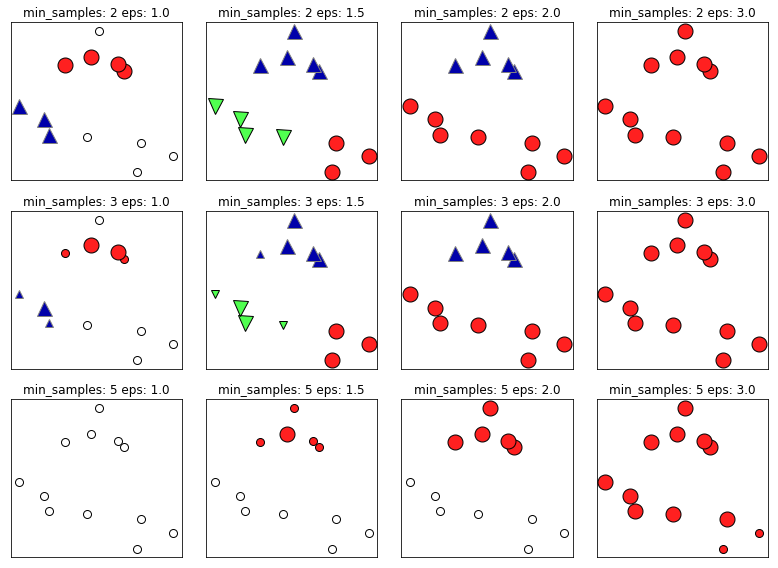

In [15]:
mglearn.plots.plot_dbscan()

- In this plot, points that belong to clusters are solid, while the noise points are shown in white. Core samples are shown as large markers, while boundary points are displayed as smaller markers. Increasing eps (going from left to right in the figure) means that more points will be included in a cluster. This makes clusters grow, but might also lead to multiple clusters joining into one. Increasing min_samples (going from top to bottom in the figure) means that fewer points will be core points, and more points will be labeled as noise.
- The parameter eps is somewhat more important, as it determines what it means forpoints to be “close.” Setting eps to be very small will mean that no points are core samples, and may lead to all points being labeled as noise. Setting eps to be very largewill result in all points forming a single cluster.
- The min_samples setting mostly determines whether points in less dense regions will be labeled as outliers or as their own clusters. If you increase min_samples, anything that would have been a cluster with less than min_samples many samples will now be labeled as noise. min_samples therefore determines the minimum cluster size.
- With min_samples=3, there are three clusters: one of four points, one of five points, and one of three points. Using min_samples=5, the two smaller clusters (with three and four points) are now labeled as noise, and only the cluster with five samples remains.
- While DBSCAN doesn’t require setting the number of clusters explicitly, setting eps implicitly controls how many clusters will be found. Finding a good setting for eps is sometimes easier after scaling the data using StandardScaler or MinMaxScaler, asusing these scaling techniques will ensure that all features have similar ranges.

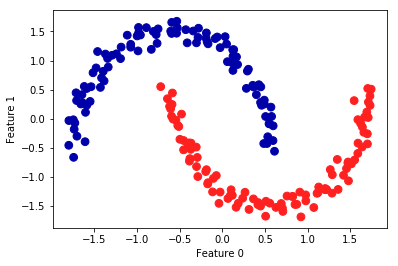

In [21]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

---

# IMPORTANT POINTS

- k-means clustering:
    - Most commonly used.
    - Process:
        1. Initialize, pick n_clusters numbers as initial center.
        2. Label each point to the closest center.
        3. Recalculate the mean.
        4. Assign the mean as the new center.
        5. Do step 2. 
        6. Continue until center remain unchanged.
    - Same as classification but have no ground truth.
    - Parameters:
        - n_clusters, specifying the number of clusters it will be.
    - Attributes:
        - labels_, the predicted value of dataset
        - cluster_centers_
    - Methods:
        - predict(), ex: kmeans.predict(X)
        - fit(), ex: kmeans.fit(X)
        - transform(), adding features specified by n_clusters. Ex: if KMeans(n_clusters=10).fit(X). Now X has 10 features, containing distances to each cluster centers.
    - Strenghts:
        - Can add new features to simple data.
        - Easy to understand and to implement.
        - Relatively quick.
    - Weaknesses:
        - Works well only on data with relatively simple shape.
        - Assume every directions equally matters.
        - Relies on random initialization. 
        - Restrictive on simple shape.
        
        
- Agglomerative Clustering:
    - Linkage criteria specify how exactly the "most similar cluster" is measured.
        - ward: do not increase variance too much.
        - average: merge clusters with smallest average distance.
        - complete: merge clusters with smalles maximum distance.
    - Process:
        - Initially, each points are its own clusters.
        - Closest clusters get merged.
        - Merged until the specified number of clusters.
    - We can visualize the hierarchical clustering by using dendrogram.
        - from scipy.cluster.hierachy import dendrogram, ward.
        - ward, ex: ward(X), return linkage array.
        - dendogram, return figure with axes. Capture it with plt.gca()
    - Parameters:
        - n_clusters: specifying how much clusters are there.
    - Methods:
        - fit_predict(): specifying the label of each data points.
        - No predict method!
    - Attributes:
        - labels_, same as calling fit_predict().
    - Strenghts:
        - We can visualize the process of clustering and decision it makes.
    - Weaknesses:
        - Cannot clustering data with complex shape.
        
        
- Density based spatial clustering of application with noise (DBSCAN)
    - Focus on core samples (core points), points where there are min_samples within them. If there are not enough samples within them, we call it noise.
    - Process:
        - Initially pick random point. 
        - If that point has minimum sample within  eps distance, then it become core sample. 
        - If not, it becomes noise.
        - Then visit other points, if that points have not labeled yet, then it get labeled. If that point is a core sample, then it visited their boundary samples.
        - Process continues until there is no core samples within eps distance from other core samples.
    - Parameters:
        - mix_samples: specifying minimum numbers within point to be called as core sample. If we increase it, will end up with many noise.
        - eps: distance of influence, if we increase it, will end up making all data points as one cluster.
    - Strenght:
        - We do not have to specify the number of clusters.
        - Can capture clusters with complex shapes.
        - Can identify points that are not part of any cluster.
    - Weaknesses:
        - Slower than KMeans and AgglomerativeClustering.
        - But still scales to relatively large datasets.
        - Complex process.